# Non-Dispersive Gaussian Wave Packet

A non-dispersive gaussian wave packet follows the advection equation:
\begin{align}
\frac{\partial y}{\partial t} + v \frac{\partial y}{\partial x} = 0  
\end{align}
this equation is obtained by asserting that
\begin{align}
y(x,t + \Delta t) = y(x - c\Delta t, t) 
\end{align}
and taylor expanding about $\Delta t$.

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import simpson
from scipy import sparse
import matplotlib.pyplot as plt

def gaussian(x, A, x0, sigma):
    return A*np.exp(-(x-x0)**2/(2*sigma**2))

dx = 0.05
space = np.arange(-20, 20, dx)
dt = 0.5*dx
v = 1

ti, tf = 0, 10
time = np.arange(ti, tf, dt)
print(time.shape)

y0 = gaussian(space, 1, 0, 2)

# First derivative (central difference)
D1 = sparse.diags([-1, 1], [-1, 1], shape=(len(space), len(space))) / (2*dx)

def system(t, y):
    return -v * D1.dot(y)

sol = solve_ivp(system, [ti, tf], y0, t_eval=time)
Y = sol.y

(400,)


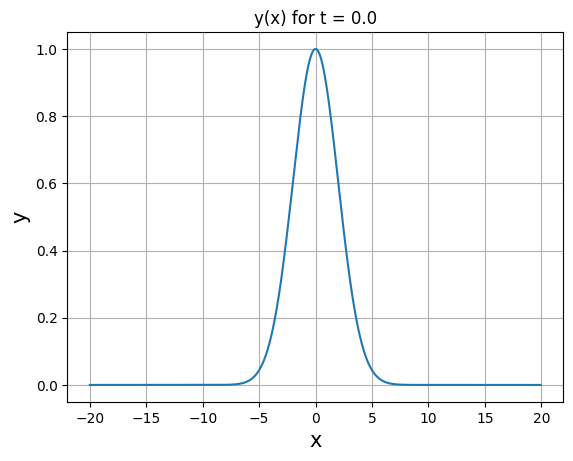

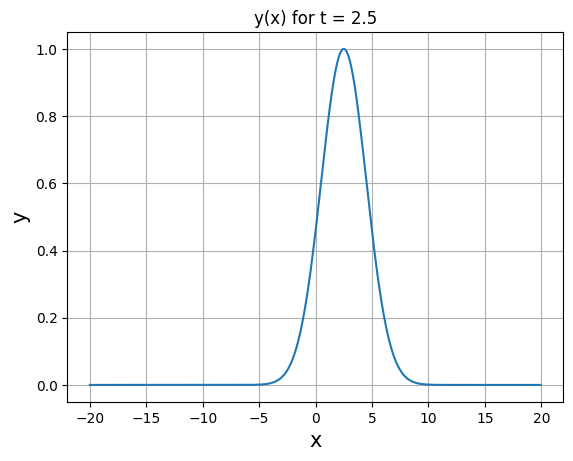

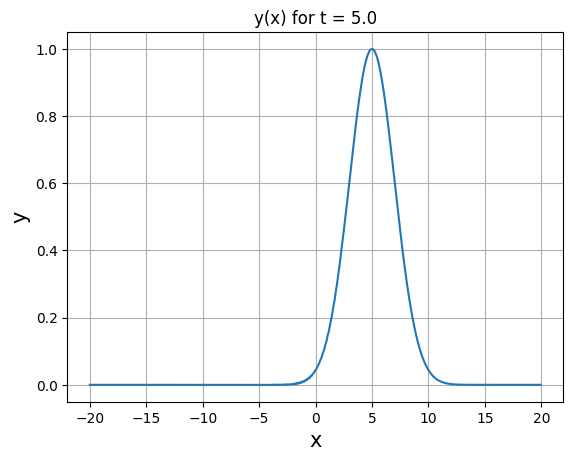

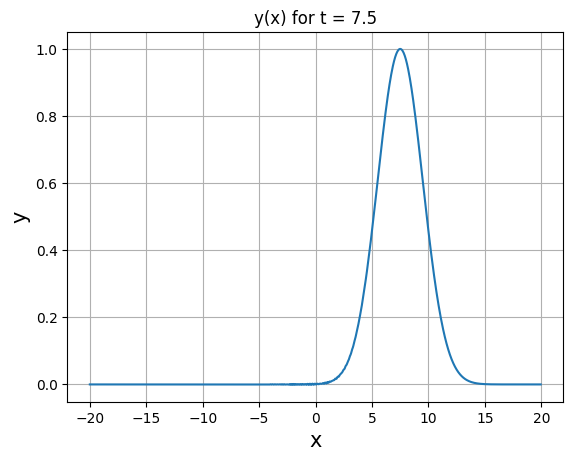

In [3]:

for i, t in enumerate(time):
    if i % 100 == 0:
        plt.plot(space, Y[:, i], label = 'Gaussian')
        plt.xlabel('x', fontsize = 15)
        plt.ylabel('y', fontsize = 15)
        plt.title(f'y(x) for t = {t}')
        plt.grid()
        plt.show() 


Now try Gaussian for wave equation:

\begin{align*}
\frac{\partial^2 y}{\partial t^2}  = c^2 \frac{\partial^2 y}{\partial x^2}
\end{align*}

Try initial form of Gaussian:
\begin{align*}
y(x,t) = \exp{\left(\frac{-\left(x-x_0\right)^2}{2 \sigma^2}\right)} \exp{\text{i}\omega t}
\end{align*}


In [6]:
j = complex(0,1)
dx = 0.05*0.1
dt = 0.5*0.05
initial, final = 0, 10
x_array = np.arange(-20, 20, dx)
t_array = np.arange(initial, final, dt)
print(t_array.shape, x_array.shape)

x0 = -5
sigma = 2
omega = 3
c = 1
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x_array.size, x_array.size)) / dx**2
V_height = 10
V = np.zeros(np.shape(x_array))
for i, _x in enumerate(x_array):
    if _x >= 0:
        V[i] = V_height

def gaussian_wave(x, t, x0, sigma, omega):
    spatial = np.exp(-(x-x0)**2/(2*sigma**2))
    temporal = np.exp(j*omega*(t - x))
    y = spatial*temporal
    dydt = j*omega*y 
    return y, dydt

y0, dy0 = gaussian_wave(x_array, t_array[0], x0, sigma, omega)
s0 = np.concatenate([y0, dy0])

def system(t, s):
    y = s[:len(x_array)]
    dy = s[len(x_array):]
    d2y = c**2*D2.dot(y) - V*y
    return np.concatenate([dy, d2y])

sol = solve_ivp(system, [initial, final], s0, 'RK45', t_array)
print(sol.y.shape)
sol_y = sol.y[:len(x_array), :]
sol_dy = sol.y[len(x_array):, :]
print(sol_y.shape, sol_dy.shape)
sol_y = sol_y.transpose()
sol_dy = sol_dy.transpose()

(400,) (8000,)
(16000, 400)
(8000, 400) (8000, 400)


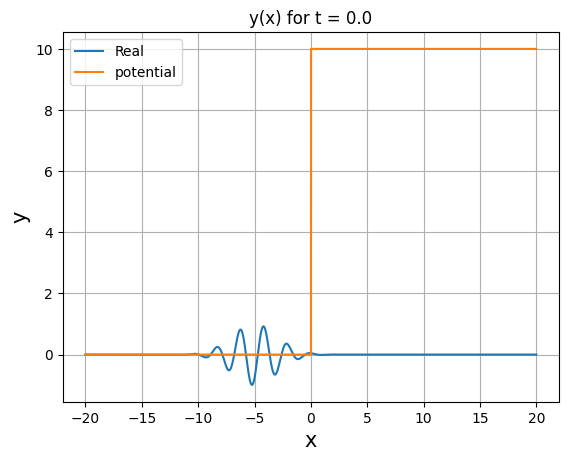

In [8]:
for i, t in enumerate(t_array):
    if i % 1000 == 0:
        plt.plot(x_array, sol_y[i].real, label = 'Real')
        plt.plot(x_array, V, label = 'potential')
        # plt.plot(x_array, sol_y[i].imag, label = 'Imaginary')
        plt.xlabel('x', fontsize = 15)
        plt.ylabel('y', fontsize = 15)
        plt.title(f'y(x) for t = {t}')
        plt.grid()
        plt.legend()
        plt.show() 